In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad


Selected enegies= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.519329648241206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.652334673366834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
intrinsic_peak= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

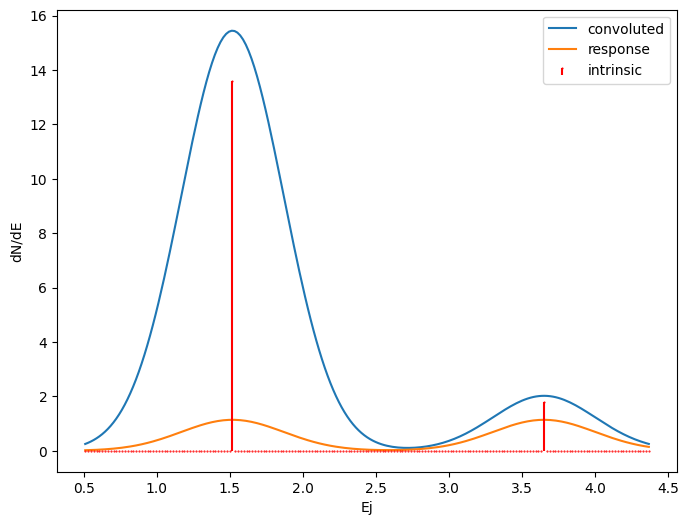

In [25]:
# incorporates the intrisic and response function 
N_i = [] # to store the observed data
N_i1 = [] # to store the dectector's response data
minor_gaussian = [] #store the energy 
M_e = 0.511  # mass of the electron in MeV 
E_max = 3.508 + M_e  # endpoint energy for He-6 in MeV
channels= 200 # is the number of channels in the spectrum

sigma_energy=20*((E_max-M_e)/channels)
E_i = np.linspace((M_e), (E_max+sigma_energy), channels)# is a range of the emitted electron's energy 
E_j = np.linspace((M_e), (E_max+sigma_energy), channels)# is a range of the emitted electron's energy 
Ej_max= max(E_j)
Ei_max=max(E_i)
Ej=min(E_j)
Ei=min(E_i)

preserve_index1 = 162
preserve_index2 = 52

dEi=(Ei_max-Ei)/channels
dEj=(Ej_max-Ej)/channels
counts=0
sum_counts=0
E_2 = [0] * len(E_i)
con=0
sum_con=0
E_2[preserve_index1] = E_i[preserve_index1]
E_2[preserve_index2] = E_i[preserve_index2]
print('Selected enegies=',E_2)

def dN_dE(Ei):
    if Ei<=M_e:
        p_e=0
    else:
        p_e=np.sqrt((Ei*Ei)-(M_e*M_e))# momentum term
    diff=(E_max-Ei)**2 
    return p_e*diff*Ei

area=[0]*len(E_i)
area2=[0]*len(E_i)
some_energy1=E_i[preserve_index1]
some_energy2=E_i[preserve_index2]

y_val1= dN_dE(some_energy1)
y_val2= dN_dE(some_energy2)

area2[preserve_index1] = 1
area2[preserve_index2] = 1
print('intrinsic_peak=', area2)
area[preserve_index1] = y_val1
area[preserve_index2] = y_val2
print('detector_response=', area)



while Ej<=Ej_max:
    #print(Ej)
    counts=0
    new_a=0
    Ei=min(E_i)
    for Ei,a,a2 in zip(E_2, area, area2):
        #1/(np.sqrt(2*np.pi)*sigma_energy*dEi))
        tail=np.exp(-(Ei - Ej)**2 / (2 * sigma_energy**2)) / (np.sqrt(2 * np.pi) * sigma_energy*dEi)# the exponential tail term
        dcounts = a*tail*dEi
        denergy= a2*tail*dEi
        con=con+denergy
        counts=counts+dcounts
        #print(counts)
        #print(Ej, Ei, counts)
        Ei=Ei+dEi
    sum_counts=sum_counts+counts
    sum_con=sum_con+con

    #print(sum_counts)
    counts=0
    con=0
    N_i.append(sum_counts)
    minor_gaussian.append(Ej)
    N_i1.append(sum_con)
    #minor_gaussian.append(Ej)
    sum_counts=0
    sum_con=0
    Ej=Ej+dEj

plt.figure(figsize=(8, 6))
plt.plot(minor_gaussian, N_i, label='convoluted')
plt.plot(minor_gaussian, N_i1, label='response')


plt.stem(E_j, area, linefmt='r-', markerfmt='ro', basefmt=' ', label='intrinsic')

plt.setp(plt.gca().lines, markersize=0.5) 
plt.xlabel('Ej')
plt.ylabel('dN/dE')
plt.legend()  
plt.show()



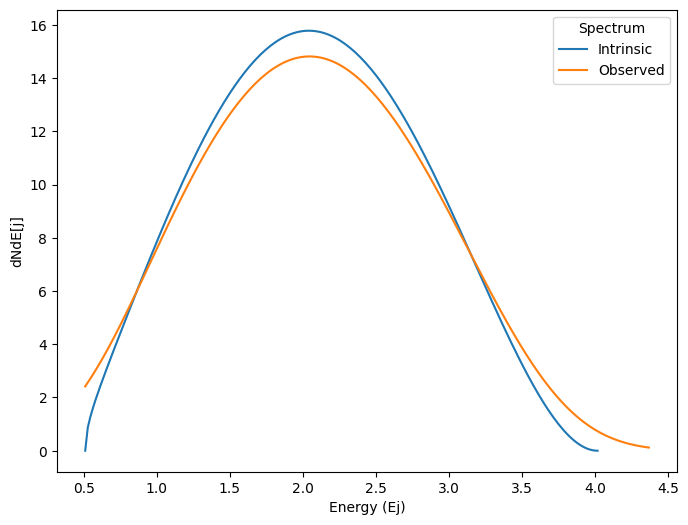

In [26]:
M_e = 0.511  # mass of the electron in MeV 
E_max = 3.508 + M_e   # endpoint energy for He-6 in MeV
channels= 200  # is the number of channels in the spectrum
#sigma_energy=1
sigma_energy=20*((E_max-M_e)/channels)
#print(sigma_energy)
X_o=E_max/M_e
E = np.linspace(M_e, E_max, channels)
E_j = np.linspace(M_e, (E_max+sigma_energy), channels)

observed_spectrum=[]
observed_energy=[]

def func_1(X_i):
    p_e = np.sqrt(X_i**(2)-1)
    f_1 = p_e * X_i * (X_o -X_i)**2
    return f_1

def intrinsic_func(E_i):
    f1=np.sqrt((E_i*E_i)-(M_e*M_e))*E_i*(E_i-E_max)**2
    return f1
def response_func(E_i, E_j):
    return np.exp(-(E_i - E_j)**2 / (2 * sigma_energy**2)) / (np.sqrt(2 * np.pi) * sigma_energy)

for Ej in E_j:
    integral=intrinsic_func(E)*response_func(E, Ej)
    approx = np.trapz(integral, E)
    observed_spectrum.append(approx)
    observed_energy.append(Ej)


intrinsic_spectrum=intrinsic_func(E)

plt.figure(figsize=(8, 6))
plt.plot(E, intrinsic_spectrum, label='Intrinsic')
plt.plot(observed_energy, observed_spectrum, label='Observed')
plt.xlabel('Energy (Ej)')
plt.ylabel('dNdE[j]')
plt.legend(title='Spectrum')
plt.show()